## Demonstration with Haberman Survival Data

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [3]:
# Get the data and its  label from the dataframe
x = df.loc[:, 0:2].values
_y = df.loc[:, 3].values
# Peek the data
x.shape, _y.shape, x[:1], _y[:30]

((306, 3),
 (306,),
 array([[30, 64,  1]]),
 array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1]))

In [4]:
# See stats all the features
stats = np.vstack(( np.min(x, 0), np.max(x, 0), np.mean(x, 0), np.std(x, 0)))
df_stats = pd.DataFrame(stats)
df_stats.rename({0: "Min", 1: "Max", 2: "Mean", 3: "Std"})

,0,1,2
Min,30.000000,58.000000,0.000000
Max,83.000000,69.000000,52.000000
Mean,52.457516,62.852941,4.026144
Std,10.785785,3.244091,7.177896


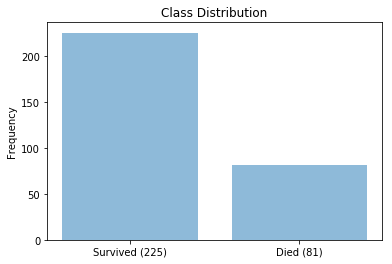

In [5]:
# See the class distribution
n_survived = len(np.where(_y == 1)[0])
n_died = len(np.where(_y == 2)[0])
classes = ('Survived (%s)' % (n_survived), 'Died (%s)' % (n_died))
y_pos = np.arange(len(classes))
plt.bar(y_pos, [n_survived, n_died], align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

### Data Transformation

In [6]:
# Normalize x
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)
# See stats all the features
stats_normalized = np.vstack(( np.min(x, 0), np.max(x, 0), np.mean(x, 0), np.std(x, 0)))
df_stats_normalized = pd.DataFrame(stats_normalized)
df_stats_normalized.rename({0: "Min", 1: "Max", 2: "Mean", 3: "Std"})

,0,1,2
Min,-2.082140e+00,-1.495933e+00,-5.609086e-01
Max,2.831735e+00,1.894848e+00,6.683554e+00
Mean,1.393221e-16,3.889409e-16,2.612289e-17
Std,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Transform the training label
# 1 (the patient survived 5 years or longer)= 1, 2 (the patient died within 5 year) = 0
y = np.zeros(_y.shape[0], dtype=int)
y[_y==1] = 1
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1])

In [8]:
# Divide the data
# Training 70%, Test 30%
n = int(0.7 * x.shape[0])
x_train, y_train = x[:n], y[:n]
x_test, y_test = x[n:], y[n:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((214, 3), (214,), (92, 3), (92,))

### Logistic Regression at Play

In [9]:
from log_regression import LogisticRegression

In [10]:
# Training with alpha = 0.01
classifier = LogisticRegression(alpha=0.01)
classifier.fit(x_train, y_train, 10000)
acc, conf = classifier.evaluate(x_train, y_train, verbose=True)

Accuracy: 0.752336448598
Confusion matrix: 
 [[  10.   46.]
 [   7.  151.]]


In [11]:
# See the score for test data
acc, conf = classifier.evaluate(x_test, y_test, verbose=True)

Accuracy: 0.782608695652
Confusion matrix: 
 [[  9.  16.]
 [  4.  63.]]


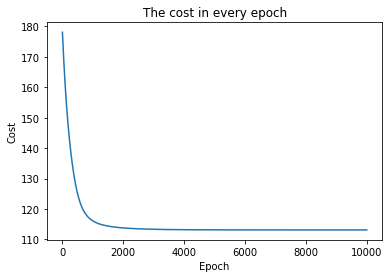

In [12]:
# See the cost log graph
import matplotlib.pyplot as plt 

x = np.arange(len(classifier.cost_log)) + 1
plt.plot(x, classifier.cost_log)
plt.title('The cost in every epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()